### Starting Point

A dataset containing information on bank wages of various demographic characteristics has been submitted to me. A stakeholder is interested in gaining insights from this dataset through my research.

##### Specifically, the following 3 assumptions are at issue: 
    - Do men earn more than women just because they are men?
    - Is the starting salary of a master's graduate higher on average than that of a bachelor's graduate?
    - Is there a significant correlation between starting salary and current salary?

### Data Mining

In order to get a first overview of the data, we first import pandas and other helpful libraries, in order to be able to import the data afterwards.

In [172]:
# Import libraries & read .txt-file containing the data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('us_bank_wages/us_bank_wages.txt', delimiter="\t")
df.head(3)

,Unnamed: 0,SALARY,EDUC,SALBEGIN,GENDER,MINORITY,JOBCAT
0,0,57000,15,27000,1,0,3
1,1,40200,16,18750,1,0,1
2,2,21450,12,12000,0,0,1


When importing the .txt file, unfortunately an additional index column has been transferred. We remove this before we take a closer look at the data.

In [173]:
#Remove .txt-File index-column
df.drop('Unnamed: 0', axis = 1, inplace = True)
df.head(3)

,SALARY,EDUC,SALBEGIN,GENDER,MINORITY,JOBCAT
0,57000,15,27000,1,0,3
1,40200,16,18750,1,0,1
2,21450,12,12000,0,0,1


To get a numerical overview of the data set, we first display the shape, info, describe and count the different values per column.

In [174]:
df.shape

(474, 6)

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474 entries, 0 to 473
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   SALARY    474 non-null    int64
 1   EDUC      474 non-null    int64
 2   SALBEGIN  474 non-null    int64
 3   GENDER    474 non-null    int64
 4   MINORITY  474 non-null    int64
 5   JOBCAT    474 non-null    int64
dtypes: int64(6)
memory usage: 22.3 KB


In [176]:
df.describe()

,SALARY,EDUC,SALBEGIN,GENDER,MINORITY,JOBCAT
count,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000
mean,34419.567511,13.491561,17016.086498,0.544304,0.219409,1.411392
std,17075.661465,2.884846,7870.638154,0.498559,0.414284,0.773201
min,15750.000000,8.000000,9000.000000,0.000000,0.000000,1.000000
25%,24000.000000,12.000000,12487.500000,0.000000,0.000000,1.000000
50%,28875.000000,12.000000,15000.000000,1.000000,0.000000,1.000000
75%,36937.500000,15.000000,17490.000000,1.000000,0.000000,1.000000
max,135000.000000,21.000000,79980.000000,1.000000,1.000000,3.000000


In [177]:
df.nunique()

SALARY      221
EDUC         10
SALBEGIN     90
GENDER        2
MINORITY      2
JOBCAT        3
dtype: int64

After looking at the output information, it can be seen that all columns are of the integer type. If we look at the descriptive data, we can assume that the columns 'EDUC', 'JOBCAT', 'GENDER' and 'MINORITY' each contain categorical values. In order to test this theory more closely, we have the values of the entire data set output in a pair plot.

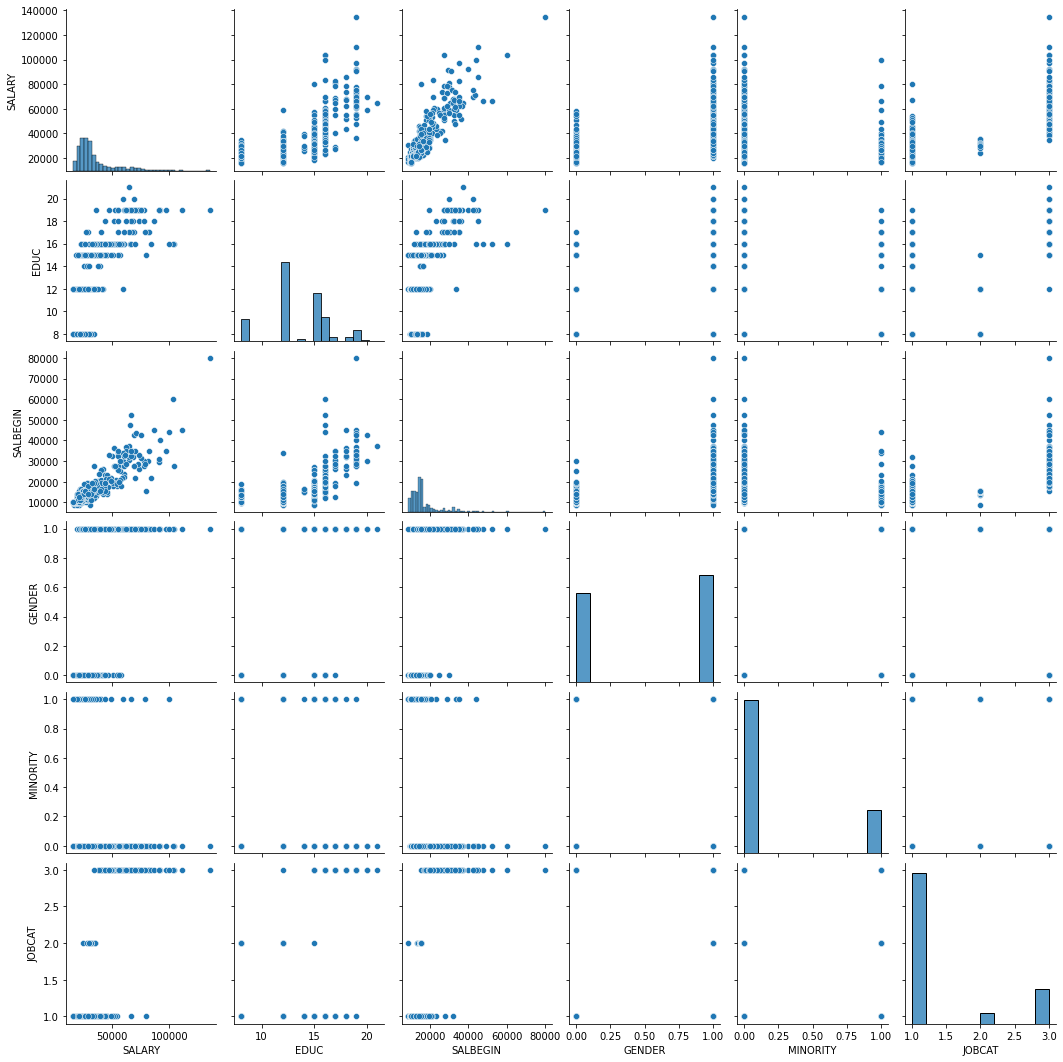

In [178]:
sns.pairplot(df)

Our thesis can be confirmed by looking at the pairplot. The values of the columns 'EDUCATION', 'JOBCAT', 'GENDER' and 'MINORITY' are categorical variables.

### Question 1: Do men earn more than women just because they are men?

But now back to our assumptions. Let's start with the first of the three. Do men earn more than women just because they are men?
In order to gain insights into this matter, it is useful to first display a boxplot of the income by men and women, as this provides a simple overview of the most important explorative parameters.

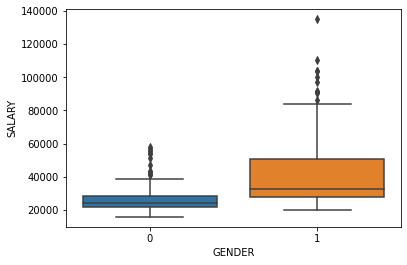

In [179]:
ax = sns.boxplot(x="GENDER", y="SALARY", data=df)

At first glance, the question seems to be unambiguously answered, but it must be taken into account that the original assumption cannot be tested in this way. In order to do so, it is advisable to keep the other variables constant. We do this in the following way: There is no question that salary and gender are compared. In order to be able to keep the other variables constant, we examine the job category that comprises the largest sample and only examine the group of no-minorites. The final comparison is then made between the two genders at the same education level.

The first step in this task is to filter the data set according to the corresponding specifications. To do this, i checked the number of values for each property. 'JOBCAT' = 1 (i.e., administrative jobs) and 'MINORITY' = 0 (i.e., no minority) each had the highest values, so we decided on this filter. This way, the sample size can be kept as large as possible. We then check the sample sizes of the individual expressions in the education column.

In [180]:
df_1 = df[(df['JOBCAT'] == 1) & (df['MINORITY'] == 0)]
df_1.EDUC.value_counts()

12    131
15     86
8      33
16     18
14      5
17      1
18      1
19      1
Name: EDUC, dtype: int64

In order to achieve meaningful results, we focus in the following only on the 4 education levels, which contain the remaining large amount of data. the graphical representation is again done with the help of the boxplot, but in this case we use the possibility of subplots to get a better overview of the different characteristics.

Text(0.5, 1.0, 'Education Level 16')

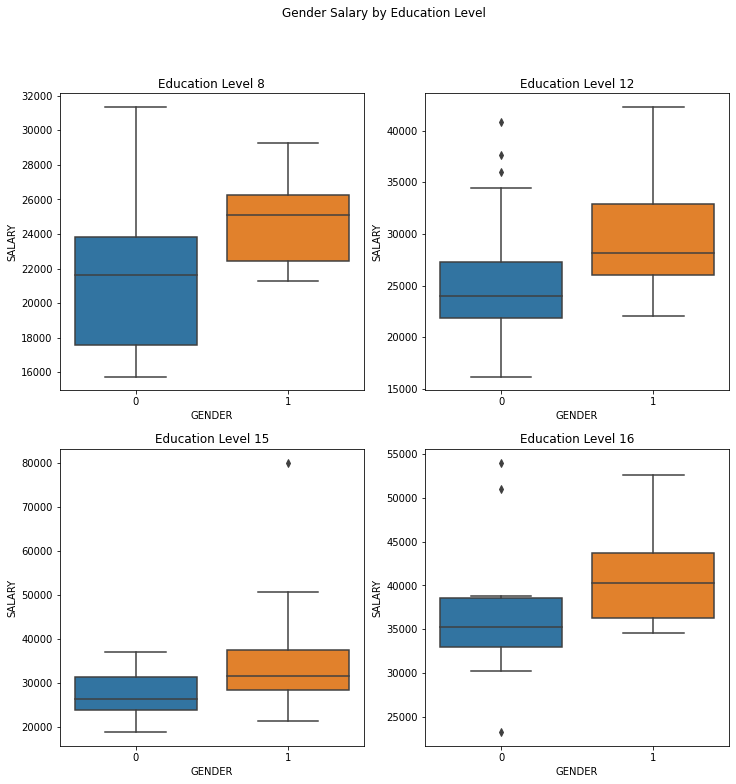

In [181]:
df_1_1 = df_1[['SALARY', 'EDUC', 'GENDER']].set_index('EDUC') 

edu_8 = df_1_1.loc[8]
edu_12 = df_1_1.loc[12]
edu_15 = df_1_1.loc[15]
edu_16 = df_1_1.loc[16]

fig, axes = plt.subplots(2, 2, figsize=(12, 12))

fig.suptitle('Gender Salary by Education Level')

sns.boxplot(ax=axes[0,0], data=edu_8, x='GENDER', y='SALARY')
sns.boxplot(ax=axes[0,1], data=edu_12, x='GENDER', y='SALARY')
sns.boxplot(ax=axes[1,0], data=edu_15, x='GENDER', y='SALARY')
sns.boxplot(ax=axes[1,1], data=edu_16, x='GENDER', y='SALARY')

axes[0,0].set_title('Education Level 8')
axes[0,1].set_title('Education Level 12')
axes[1,0].set_title('Education Level 15')
axes[1,1].set_title('Education Level 16')

After examining this representation, it can be seen that men earn a higher average income than women across all education levels - at least in the case of job category 1 and in the non-minority group. a general answer to the question of whether men earn more money than women simply because they are men cannot be given, as the attempt to keep the variables constant had a negative impact on the sample size and thus also on representativeness.


### Question 2: Is the starting salary of a college graduate higher on average than that of a high school graduate?

So how can we determine that a college graduate can expect a higher starting salary on average than a high school graduate? To do this, it is important to read the data in such a way that a statement can be made about this. The 'EDUC' column indicates the number of years in which the test person has received education. Depending on the type of degree, a college graduate can be expected to have an education level of 15-16, while a high school graduate can be expected to have an education level of 12.

With the help of this information we can start filtering the required data. For this we create two series, one containing all college graduates and a second one containing all high school graduates.

In [182]:
df_grad = df[(df['EDUC'] == 15) | (df['EDUC'] == 16) | (df['EDUC'] == 12)]
df_grad.describe()


,SALARY,EDUC,SALBEGIN,GENDER,MINORITY,JOBCAT
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,31340.684932,13.600000,15465.082192,0.493151,0.230137,1.257534
std,12187.485940,1.701325,5406.470456,0.500639,0.421498,0.641495
min,16200.000000,12.000000,9000.000000,0.000000,0.000000,1.000000
25%,24000.000000,12.000000,12450.000000,0.000000,0.000000,1.000000
50%,27900.000000,12.000000,15000.000000,0.000000,0.000000,1.000000
75%,34500.000000,15.000000,16500.000000,1.000000,0.000000,1.000000
max,103750.000000,16.000000,60000.000000,1.000000,1.000000,3.000000


Now let's get an overview of the numbers. Now let's get an overview of the numbers. In this case, the easiest way to do this is to use a boxplot.

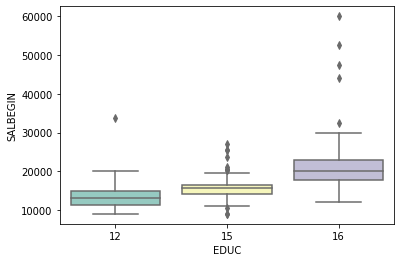

In [183]:
ax = sns.boxplot(x="EDUC", y="SALBEGIN", data=df_grad, palette="Set3")

In order to achieve meaningful results, we focus in the following only on the 4 education levels, which contain the remaining large amount of data. the graphical representation is again done with the help of the boxplot, but in this case we use the possibility of subplots to get a better overview of the different characteristics.


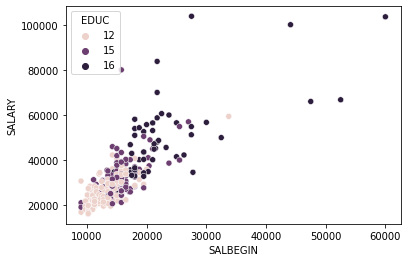

In [184]:
ax = sns.scatterplot(data=df_grad, x="SALBEGIN", y="SALARY", hue="EDUC")

First of all, there is a clear clustering of high school graduates in the lower regions of salary and starting salary. in addition, there is a clear demarcation between senior college graduates and high school graduates. there appears to be a greater mix of senior and junior graduates in the higher regions of salary and starting salary. Therefore, we now focus on a comparison between junior and senior college graduates.

To do this, we separate the data set so that only education level 15 for junior college completion and education level 16 for senior college completion remain and look at the scatterplot again.

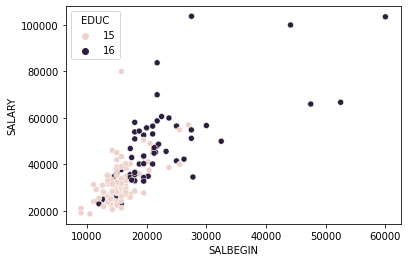

In [185]:
df_col = df[(df['EDUC'] == 15) | (df['EDUC'] == 16)]
ax = sns.scatterplot(data=df_col, x="SALBEGIN", y="SALARY", hue="EDUC")

Just looking at these two expressions, we notice that there is less mixing than first thought. To check whether a junior college degree is equivalent to a senior college degree in terms of salary and starting salary. There is quite a strong trend indicating that even the difference between junior college degree and senior college degree can make a difference in salary in favor of the senior college degree.

Before we run the linear regression for the two education data sets, we need to clarify whether there is a correlation between salary and starting salary at all. This brings us to the third assumption.

### Question 3: Is there a significant correlation between starting salary and current salary?

Based on the scatterplot from the pairplot at the beginning of this analysis, it can be assumed that there is a correlation between salary and starting salary. This must now be verified. Here we first look at the plot again.

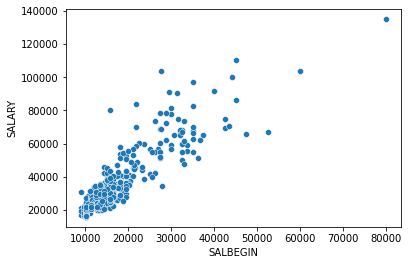

In [186]:
ax = sns.scatterplot(data=df, x="SALBEGIN", y="SALARY")

We perform the correlation check using linear regression. To do this, we first import statsmodel, select our target ('SALARY'),our feature ('SALBEGIN') and add the constant.

In [187]:
import statsmodels.api as sms

In [188]:
X = df[['SALBEGIN']]
y = df.SALARY
X = sms.add_constant(X)

Now we create our model, and use its data to determine our intercept and slope. with the summary we can return the output of the model

In [189]:
# Create an OLS model
model = sms.OLS(y, X)
# use the data to calculate the intercept and slope
results = model.fit()
# return the output of the model
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 SALARY   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     1622.
Date:                Wed, 17 Feb 2021   Prob (F-statistic):          8.20e-155
Time:                        16:01:04   Log-Likelihood:                -4938.3
No. Observations:                 474   AIC:                             9881.
Df Residuals:                     472   BIC:                             9889.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1928.2058    888.680      2.170      0.031     181.947    3674.464
SALBEGIN       1.9094      0.047     40.276      0.000       1.816       2.003
==============================================================================
Omnibus:                      199.258   Durbin-Watson:                   1.830
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1534.909
Skew:                           1.630   Prob(JB):                         0.00
Kurtosis:                      11.191   Cond. No.                     4.47e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In the OLS regression results, it can be seen that there is indeed a correlation between salary and starting salary. this can be seen from the Adjusted R-squared value, which is close to 1.

In [190]:
intercept, slope = results.params

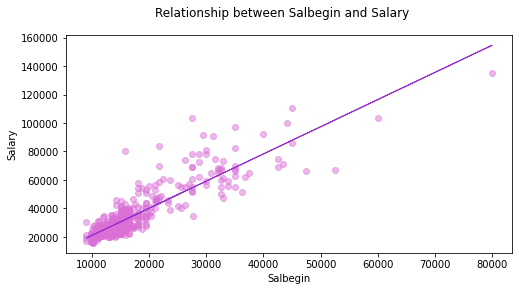

In [191]:
fig, ax = plt.subplots(figsize=(8, 4))
x = df.SALBEGIN
ax.scatter(x, y, alpha=0.5, color='orchid')
fig.suptitle('Relationship between Salbegin and Salary')
ax.plot(x, x*slope +intercept, '-', color='darkorchid', linewidth=1);
ax.set_ylabel("Salary");
ax.set_xlabel("Salbegin");

### multivariate linear regression

After we have already performed a linear regression within the EDA, we now turn to multivariate regression.
Again, the salary is our target, the prediction of which has to be optimized.

To prepare for Multivariate Regression, we first create dummy variables for each of our categorical variables ('EDUC', 'GENDER', 'MINORITY' & 'JOBCAT').

In [193]:
educ_dummies = pd.get_dummies(df['EDUC'], prefix='edu', drop_first=True)
gender_dummies = pd.get_dummies(df['GENDER'], prefix='gd', drop_first=True)
minority_dummies = pd.get_dummies(df['MINORITY'], prefix='mino', drop_first=True)
jobcat_dummies = pd.get_dummies(df['JOBCAT'], prefix='jcat', drop_first=True)

In the next step, we first drop the associated origin columns of the corresponding variables.

In [194]:
df = df.drop(['EDUC','GENDER','MINORITY','JOBCAT'], axis=1)
df.head()

,SALARY,SALBEGIN
0,57000,27000
1,40200,18750
2,21450,12000
3,21900,13200
4,45000,21000


Now we add the created dummy variables to the dataset.

In [195]:
df = pd.concat([df, educ_dummies, gender_dummies, minority_dummies, jobcat_dummies], axis=1)
df.head()

,SALARY,SALBEGIN,edu_12,edu_14,edu_15,edu_16,edu_17,edu_18,edu_19,edu_20,edu_21,gd_1,mino_1,jcat_2,jcat_3
0,57000,27000,0,0,1,0,0,0,0,0,0,1,0,0,1
1,40200,18750,0,0,0,1,0,0,0,0,0,1,0,0,0
2,21450,12000,1,0,0,0,0,0,0,0,0,0,0,0,0
3,21900,13200,0,0,0,0,0,0,0,0,0,0,0,0,0
4,45000,21000,0,0,1,0,0,0,0,0,0,1,0,0,0


After the dummy variables have been implemented in the data set, the multivariate linear regression can begin. To do this, we first read in all the features to be tested before splitting the dataset into a training and a test set. In addition, the summary of the regression is output and furthermore the RMSE for training and test data set is determined.

In [209]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = df[['SALBEGIN','jcat_3']]
Y = df['SALARY']


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


X_train = sms.add_constant(X_train)
X_test = sms.add_constant(X_test)

model = sms.OLS(y_train, X_train).fit()
print_model = model.summary()

predictions = model.predict(X_train)
err_train = np.sqrt(mean_squared_error(y_train, predictions))
predictions_test = model.predict(X_test)
err_test = np.sqrt(mean_squared_error(y_test, predictions_test))

print(print_model)
print ("-------------")
print (f"RMSE on train data: {err_train}")
print (f"RMSE on test data: {err_test}")

                            OLS Regression Results                            
Dep. Variable:                 SALARY   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     837.3
Date:                Wed, 17 Feb 2021   Prob (F-statistic):          3.17e-139
Time:                        16:24:07   Log-Likelihood:                -3927.1
No. Observations:                 379   AIC:                             7860.
Df Residuals:                     376   BIC:                             7872.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7636.3683   1186.159      6.438      0.0

In this case, the interpretation is based on the RMSE value. The smaller the RMSE value, the better the model is able to predict the target.

In order not to fill this notebook unnecessarily, the tested optimal solution can be found here:

In [210]:
X = df[['SALBEGIN', 'edu_12', 'edu_14', 'edu_15', 'edu_18', 'edu_19', 'edu_20', 'edu_21', 'mino_1', 'gd_1', 'jcat_2', 'jcat_3']]
Y = df['SALARY']


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


X_train = sms.add_constant(X_train)
X_test = sms.add_constant(X_test)

model = sms.OLS(y_train, X_train).fit()
print_model = model.summary()

predictions = model.predict(X_train)
err_train = np.sqrt(mean_squared_error(y_train, predictions))
predictions_test = model.predict(X_test)
err_test = np.sqrt(mean_squared_error(y_test, predictions_test))

print(print_model)
print ("-------------")
print (f"RMSE on train data: {err_train}")
print (f"RMSE on test data: {err_test}")

                            OLS Regression Results                            
Dep. Variable:                 SALARY   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     144.5
Date:                Wed, 17 Feb 2021   Prob (F-statistic):          9.86e-131
Time:                        16:26:23   Log-Likelihood:                -3917.4
No. Observations:                 379   AIC:                             7861.
Df Residuals:                     366   BIC:                             7912.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8805.7835   1574.129      5.594      0.0


We now import pickle to save our model in a file.

In [212]:
import pickle
with open ('ML','wb') as f:
    pickle.dump(model,f)

The following command can be used to load the corresponding file and then use the trained model by entering a list of variable values. 

In [ ]:
with open ('ML','rb') as f:
    ML = pickle.load(f)

Try it!